# Метод Ньютона-Рафсона

Есть нелинейные функции многих переменных. Нужно аппроксимировать их линейной зависимостью с помощью частных производных. Тогда на каждом шаге решается полученная система линейных уравнений.
Получается последовательное приближение к истинному решению уравнения f(x)=0, которые вычисляются с помощью производной от f(x).




Таким образом:

1) x0 – нулевая итерация

2)В этой точке находим производную f'(x0)

3)С учетом разложения Тейлора, f(x) заменяется в окрестности точки касательной – прямой линией f(x0)+f'(x0)(x-x0)

4) Находим точку, в которой прямая пересекает ось Х

5) Эта точка принимается за новую итерацию, и цикл повторяется: строится касательная, точка ее пересечения с осью и т.д., пока корень не будет найден с нужной точностью

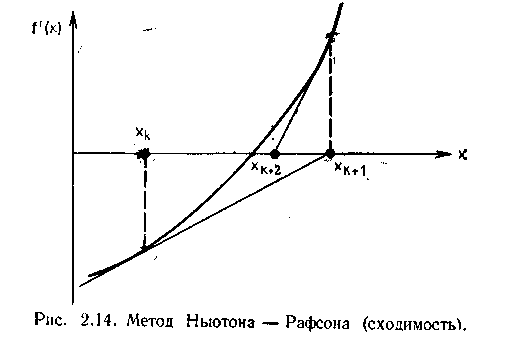

In [ ]:
def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)

  # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(abs(a[i,:]))

    for k in range(0,n-1):

      # Row interchange, if needed
        p = int(np.argmax(abs(a[k:n,k])/s[k:n])) + k
        if abs(a[p,k]) < tol: np.error.err('Matrix is singular')
        if p != k:
            np.swap.swapRows(b,k,p)
            np.swap.swapRows(s,k,p)
            np.swap.swapRows(a,k,p)

      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a [i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    if abs(a[n-1,n-1]) < tol: np.error.err('Matrix is singular')

  # Back substitution
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

In [ ]:
import numpy as np
import math
def newtonRaphson2(f,x,tol=1.0e-9):

    def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac,f0

    for i in range(30):
        jac,f0 = jacobian(f,x)
        if math.sqrt(np.dot(f0,f0)/len(x)) < tol:
            return x
        dx = gaussPivot(jac,-f0)
        x = x + dx
        if math.sqrt(np.dot(dx,dx)) < tol*max(max(abs(x)),1.0):
            return x
    print('Too many iterations')

**12.** The equations

$$
\sin x + 3 \cos x − 2 = 0 \\
\cos x − \sin y + 0.2 = 0
$$

have a solution in the vicinity of the point $(1, 1)$. Use the Newton-Raphson
method to refine the solution.

In [ ]:
import numpy as np
import math

def f(x):
    f = np.zeros(len(x))
    f[0] = math.sin(x[0]) + 3.0*math.cos(x[0]) - 2.0
    f[1] = math.cos(x[0]) - math.sin(x[1]) - 0.2
    return f
x = np.array([1.0, 1.0])
print(newtonRaphson2(f,x))
#input("\nPress return to exit")

[1.20782768 0.1556791 ]




---



# Метод бисекции

**Теорема о промежуточном значении (Теорема Больцано — Коши).**

Если непрерывная функция, определённая на вещественном промежутке, принимает два значения, то она принимает и любое значение между ними.


*Следствие.* Если функция непрерывна на отрезке и на его концах принимает значения разных знаков, то на этом отрезке существует хотя бы одна точка, в которой функция обращается в нуль.

nuli-neprerivnoj-funkcii.svg

Метод бисекции использует эту теорему о промежуточных значениях для поиска корней. Итерация деления отрезка пополам c учетом теоремы о системе вложенных отрезков позволять найти корень уравнения с значением, меньшим заданного значения error.  

**Теорема о системе вложенных отрезков**

Для всякой системы вложенных отрезков

[$a_1$, $b_1$]⊃[$a_2$, $b_2$]⊃...⊃[$a_n$, $b_n$]

существует хотя бы одна точка
c
, принадлежащая всем отрезкам данной системы.

Если, кроме того, длина отрезков системы стремится к нулю:

$lim_n→∞$($b_n$ - $a_n$) = 0

то
c
 — единственная общая точка всех отрезков данной системы.



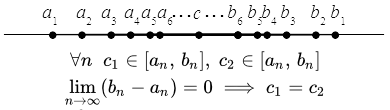

Пусть наша функция f(х), действительно, непрерывна, промежуток [a,b] вещественный, a<b. Тогда это функция соответствует условиям теоремы о промежуточных значениях.

Если значения функции на концах заданного промежутка разного знака, то, согласно *следствию* из теоремы о промежуточном значении, функция принимает все значения между каким-то отрицательным и положительным числом, то есть функция принимает значение 0 в какой-то точке из заданного промежутка.

Теперь пусть $с = \frac{b + a}{2}$, середина отрезка [a,b]. Если f(c)=0 или достигнуто значение c ошибкой, меньше заданной допустимой ошибки, тогда c – это и есть корень.

Если же $f(c) \neq 0$, давайте проанализируем сложившуюся картину. Мы разделили исходный промежуток [a,b] на два равных отрезка точкой с, являющейся его серединой, причем значение функции в точке с не равно нулю. Тогда, получается, что один из этих равных по длине отрезков содержит точку $x_i$:  f($x_i$)=0. Это утверждение следует из теоремы о промежуточном значении для функции f(x) на промежутке [a,b]. Выберем среди этих двух отрезков отрезок с разными знаками значений функции на концах и снова применим эту же теорему. Так будем делать пока значение функции в точке $c_n$ не будет равно нулю с ошибкой, меньшей заданной.

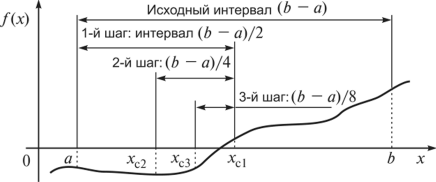

<font  size="3">**4.** Write a function `my_bisection(f, a, b, tol)`, that returns $[R, E]$, where $f$ is a function object, $a$ and $b$ are scalars such that $a < b$, and $tol$ is a strictly positive scalar value. The function should return an array, $R$, where $R[i]$ is the estimation of the root of $f$ defined by $(a + b)/2$ for the $i$-th iteration of the bisection method. Remember to include the initial estimate. The function should also return an array, $E$, where $E[i]$ is the value of $| f(R[i]) |$ for the $i$-th iteration of the bisection method. The function should terminate when $E(i) < tol$. You may assume that ${\text{sign}}(f(a)) \neq {\text{sign}}(f(b))$.

In [ ]:
def bisection_method(func, a, b, error_accept):

  def f(x):
    f = eval(func)
    return f

  error = abs(b-a)
  R = []
  E = []

  while error > error_accept:
    c = (b+a)/2

    if f(a)*f(b)>=0:
      print("Нет корней на этом промежутке")
      quit()

    elif f(c)*f(a)<0:
      b=c
      error = abs(b-a)
      R.append(error)
      E.append(f(c))

    elif f(c)*f(b)<0:
      a=c
      error = abs(b-a)
      R.append(error)
      E.append(f(c))

    else:
      print("Ошибка")
      quit()


  print(f"Error = {error}")
  print(f"Нижняя граница = {a}, \nверхняя граница = {b}, \nR = {R}, \nE = {E}")

bisection_method("x**2 - 2", 0, 2, 0.01)

Error = 0.0078125
Нижняя граница = 1.4140625, 
верхняя граница = 1.421875, 
R = [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125], 
E = [-1.0, 0.25, -0.4375, -0.109375, 0.06640625, -0.0224609375, 0.021728515625, -0.00042724609375]
